# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Answer: 48** Marketing Campaigns

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

In [3]:
#provide a larger view of used DataFrames
pd.set_option('display.max_categories', 26)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Exploratory Data Analysis

No missing information at a glance , 10 numeric features, 9 object features, 1 target

Verifying **age** value options distribution and the acceptance rate per age.

Look for target variable distribution to validate its relationship vs independent variables

In [6]:
df['y'].value_counts(normalize='True')*100


y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

Only 11%  of the customers subscribed a term deposit

In [7]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

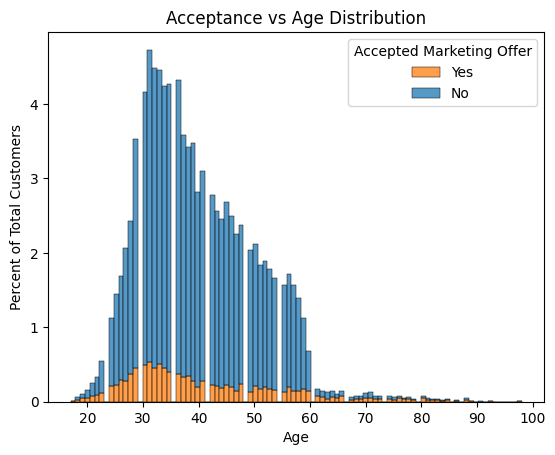

In [8]:
fig = sns.histplot(df, x='age', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Age')
fig.set_ylabel('Percent of Total Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Acceptance vs Age Distribution');

Reviewing **job type** value options distribution

In [9]:
df['job'].value_counts(normalize=True)*100

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64

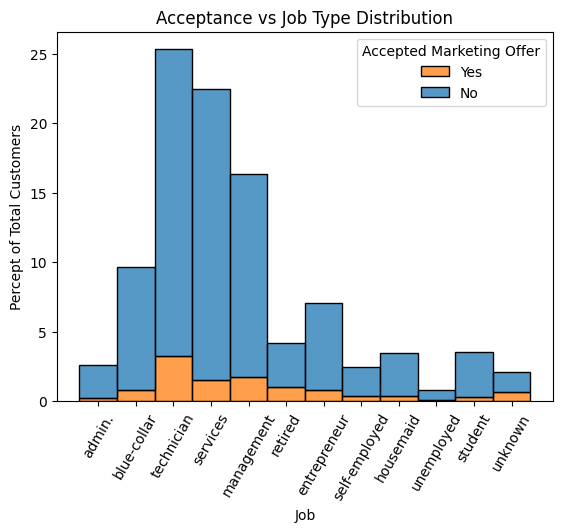

In [10]:
fig = sns.histplot(df, x='job', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Job')
fig.set_ylabel('Percept of Total Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_xticklabels(labels=df['job'].value_counts().index.tolist(), rotation=60 );
fig.set_title('Acceptance vs Job Type Distribution');

Reviewing **marital status** value options distribution

In [11]:
df['marital'].value_counts(normalize=True)*100
df[['marital','y']].value_counts(normalize=True)*100

marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64

marital   y  
married   no     54.375061
single    no     24.152666
divorced  no     10.041760
married   yes     6.147422
single    yes     3.933184
divorced  yes     1.155676
unknown   no      0.165097
          yes     0.029135
Name: proportion, dtype: float64

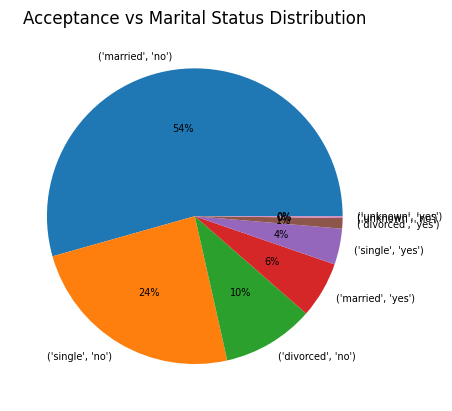

In [12]:
plt.pie(df[['marital','y']].value_counts(), labels=df[['marital','y']].value_counts().index.tolist(),autopct='%1.0f%%',textprops={'fontsize': 7})
plt.title('Acceptance vs Marital Status Distribution');

Reviewing **education level** value options distribution

In [13]:
df[['education','y']].value_counts(normalize=True)*100

education            y  
university.degree    no     25.488006
high.school          no     20.598232
basic.9y             no     13.528212
professional.course  no     11.284840
basic.4y             no      9.099738
basic.6y             no      5.108284
university.degree    yes     4.054579
unknown              no      3.593280
high.school          yes     2.503156
professional.course  yes     1.444596
basic.9y             yes     1.148393
basic.4y             yes     1.039138
unknown              yes     0.609401
basic.6y             yes     0.456444
illiterate           no      0.033990
                     yes     0.009712
Name: proportion, dtype: float64

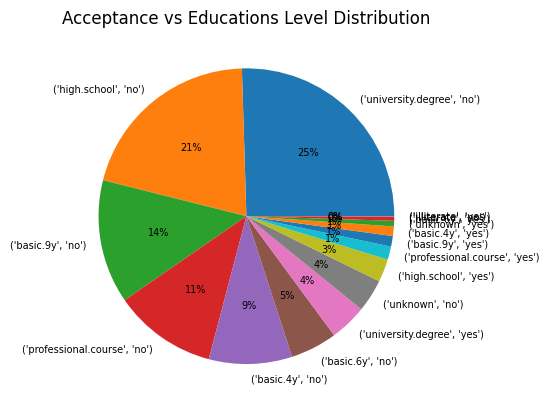

In [14]:
plt.pie(df[['education','y']].value_counts(), labels=df[['education','y']].value_counts().index.tolist(),autopct='%1.0f%%',textprops={'fontsize': 7})
plt.title('Acceptance vs Educations Level Distribution');

Reviewing **defaulted on a loan** value options distribution

In [15]:
df['default'].value_counts(normalize=True)*100
df[['default','y']].value_counts(normalize=True)*100

default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64

default  y  
no       no     68.930271
unknown  no     19.797028
no       yes    10.189861
unknown  yes     1.075556
yes      no      0.007284
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Acceptance vs Job Type Distribution')

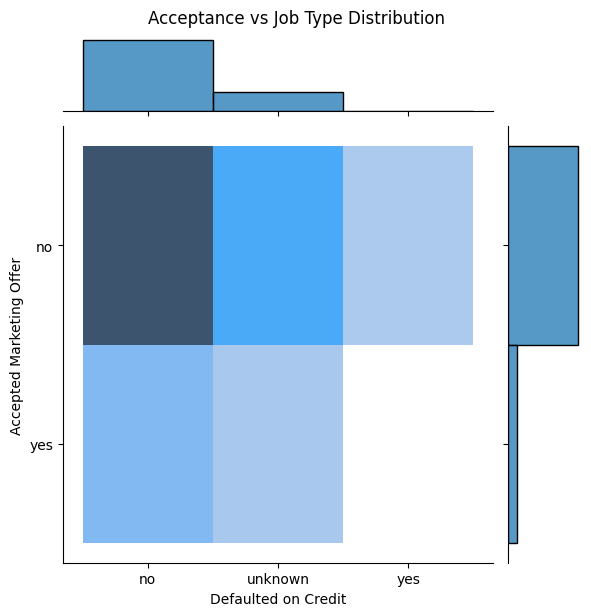

In [16]:
fig = sns.jointplot(df[['default','y']], x='default', y='y', kind='hist')
fig.set_axis_labels('Defaulted on Credit','Accepted Marketing Offer')
plt.suptitle('Acceptance vs Job Type Distribution', y=1.02)

Reviewing **house loan** value options distribution

In [17]:
df['housing'].value_counts(normalize=True).sort_index()
df[['housing','y']].value_counts(normalize=True).sort_index()

housing
no         0.452122
unknown    0.024036
yes        0.523842
Name: proportion, dtype: float64

housing  y  
no       no     0.402933
         yes    0.049189
unknown  no     0.021438
         yes    0.002598
yes      no     0.462975
         yes    0.060867
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Acceptance vs House Loan Value Distribution')

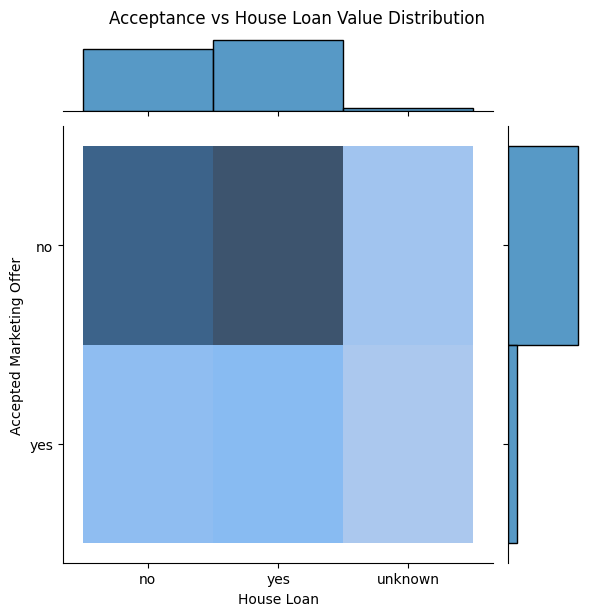

In [18]:
fig = sns.jointplot(df[['housing','y']], x='housing', y='y', kind='hist')
fig.set_axis_labels('House Loan','Accepted Marketing Offer')
plt.suptitle('Acceptance vs House Loan Value Distribution', y=1.02)

Reviewing **personal loan** value options distribution

In [19]:
df['loan'].value_counts(normalize=True)
df[['loan','y']].value_counts(normalize=True)

loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64

loan     y  
no       no     0.730795
yes      no     0.135112
no       yes    0.093474
unknown  no     0.021438
yes      yes    0.016582
unknown  yes    0.002598
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Acceptance vs Personal Loan Value Distribution')

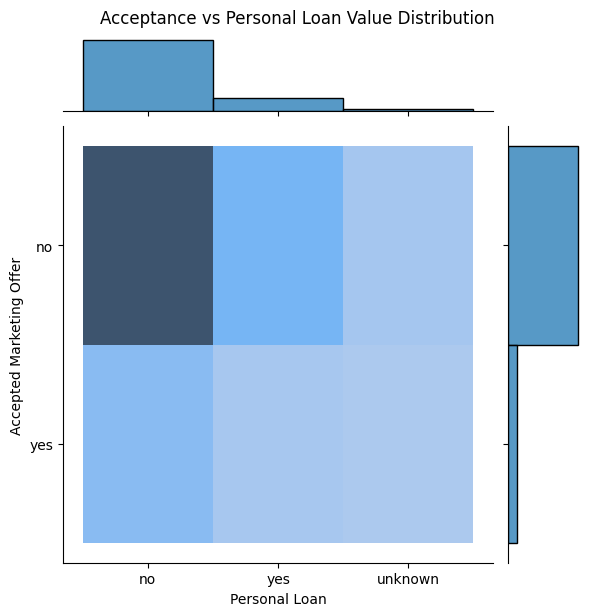

In [20]:
fig = sns.jointplot(df[['loan','y']], x='loan', y='y', kind='hist')
fig.set_axis_labels('Personal Loan','Accepted Marketing Offer')
plt.suptitle('Acceptance vs Personal Loan Value Distribution', y=1.02)

Reviewing **type of contact** value options distribution

In [21]:
df['loan'].value_counts(normalize=True)
df[['loan','y']].value_counts(normalize=True)

loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64

loan     y  
no       no     0.730795
yes      no     0.135112
no       yes    0.093474
unknown  no     0.021438
yes      yes    0.016582
unknown  yes    0.002598
Name: proportion, dtype: float64

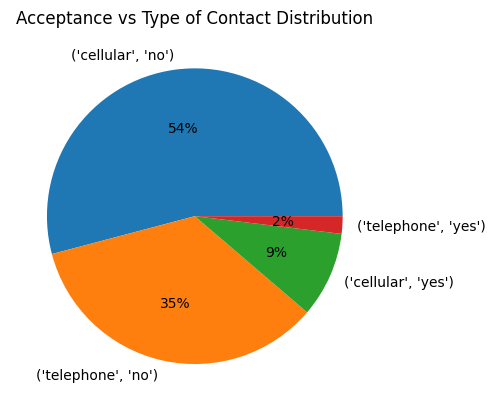

In [22]:
plt.pie(df[['contact','y']].value_counts(), labels=df[['contact','y']].value_counts().index.tolist(),autopct='%1.0f%%')
plt.title('Acceptance vs Type of Contact Distribution');

Reviewing **month** value options distribution

In [23]:
df[['month']].value_counts(normalize=True)

month
may      0.334296
jul      0.174177
aug      0.149995
jun      0.129115
nov      0.099568
apr      0.063902
oct      0.017432
sep      0.013839
mar      0.013256
dec      0.004419
Name: proportion, dtype: float64

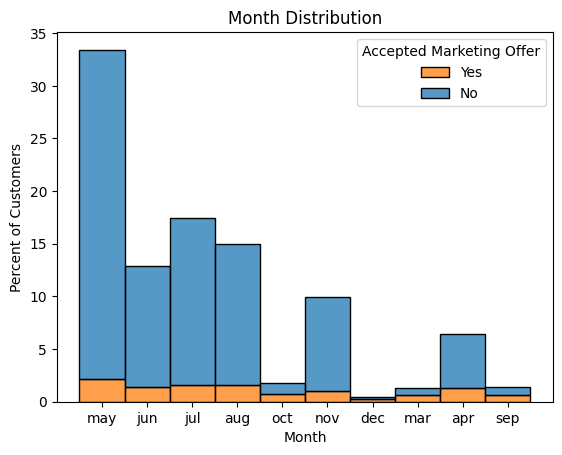

In [24]:
fig = sns.histplot(df, x='month', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Month')
fig.set_ylabel('Percent of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Month Distribution');

Reviewing **day of the week** value options distribution

In [25]:
df['day_of_week'].value_counts(normalize=True).sort_index()

day_of_week
fri    0.190031
mon    0.206711
thu    0.209357
tue    0.196416
wed    0.197485
Name: proportion, dtype: float64

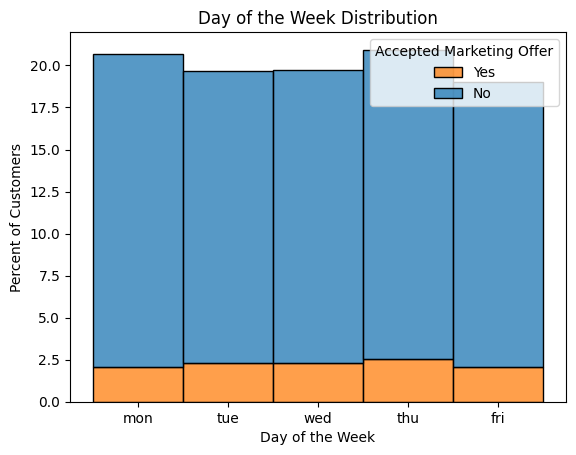

In [26]:
fig = sns.histplot(df, x='day_of_week', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Day of the Week')
fig.set_ylabel('Percent of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Day of the Week Distribution');

Reviewing **campaign contacts** value options distribution

In [27]:
df['campaign'].value_counts(normalize=True)*100
df[['campaign','y']].value_counts(normalize=True)*100

campaign
1     42.832864
2     25.662814
3     12.967369
4      6.436341
5      3.882199
6      2.376906
7      1.527144
8      0.971157
9      0.687093
10     0.546276
11     0.429737
12     0.303486
13     0.223366
14     0.167525
17     0.140818
16     0.123822
15     0.123822
18     0.080120
20     0.072837
19     0.063125
21     0.058269
22     0.041274
23     0.038846
24     0.036418
27     0.026707
29     0.024279
28     0.019423
26     0.019423
25     0.019423
31     0.016995
30     0.016995
35     0.012139
32     0.009712
33     0.009712
34     0.007284
42     0.004856
40     0.004856
43     0.004856
56     0.002428
39     0.002428
41     0.002428
37     0.002428
Name: proportion, dtype: float64

campaign  y  
1         no     37.248713
2         no     22.722638
3         no     11.573759
4         no      5.831796
1         yes     5.584151
5         no      3.590852
2         yes     2.940177
6         no      2.194814
7         no      1.434884
3         yes     1.393610
8         no      0.929882
9         no      0.645819
4         yes     0.604545
10        no      0.517141
11        no      0.400602
12        no      0.296203
5         yes     0.291347
13        no      0.213654
6         yes     0.182092
14        no      0.165097
17        no      0.131106
16        no      0.123822
15        no      0.118967
7         yes     0.092260
18        no      0.080120
20        no      0.072837
19        no      0.063125
21        no      0.058269
9         yes     0.041274
8         yes     0.041274
22        no      0.041274
24        no      0.036418
23        no      0.036418
11        yes     0.029135
10        yes     0.029135
27        no      0.026707
29        no  

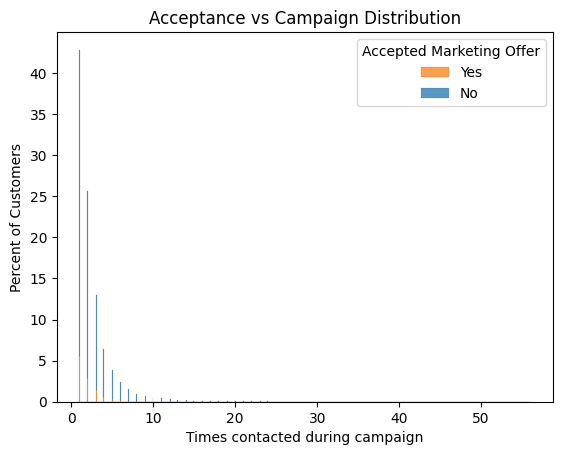

In [28]:
fig = sns.histplot(df, x='campaign', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Times contacted during campaign')
fig.set_ylabel('Percent of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Acceptance vs Campaign Distribution');

Reviewing **number of days since last contact** distribution

In [29]:
df['pdays'].value_counts(normalize=True)*100
df[['pdays','y']].value_counts(normalize=True)*100

pdays
999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
22      0.007284
19      0.007284
21      0.004856
25      0.002428
26      0.002428
27      0.002428
20      0.002428
Name: proportion, dtype: float64

pdays  y  
999    no     87.404098
       yes     8.917646
3      yes     0.723512
6      yes     0.701661
3      no      0.342333
6      no      0.298631
4      yes     0.152957
       no      0.133534
7      yes     0.097116
2      yes     0.089832
9      yes     0.084976
12     no      0.077693
10     yes     0.072837
5      yes     0.070409
9      no      0.070409
13     yes     0.067981
12     yes     0.063125
2      no      0.058269
10     no      0.053414
7      no      0.048558
1      no      0.043702
5      no      0.041274
15     yes     0.038846
11     yes     0.036418
       no      0.031563
8      yes     0.029135
14     yes     0.026707
0      yes     0.024279
14     no      0.021851
15     no      0.019423
13     no      0.019423
1      yes     0.019423
8      no      0.014567
16     yes     0.014567
17     no      0.014567
0      no      0.012139
16     no      0.012139
18     yes     0.009712
       no      0.007284
19     no      0.004856
17     yes     0.004856
21   

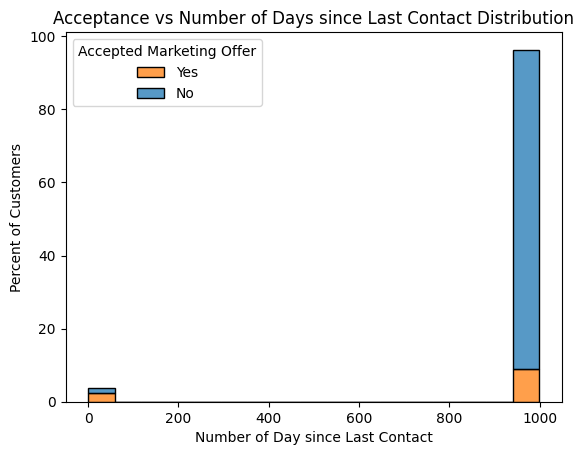

In [30]:
fig = sns.histplot(df, x='pdays', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Number of Day since Last Contact')
fig.set_ylabel('Percent of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Acceptance vs Number of Days since Last Contact Distribution');

Reviewing **number of previous contacts** value options distribution

In [31]:
df['previous'].value_counts(normalize=True)*100
df[['previous','y']].value_counts(normalize=True)*100

previous
0    86.343110
1    11.073614
2     1.830630
3     0.524425
4     0.169952
5     0.043702
6     0.012139
7     0.002428
Name: proportion, dtype: float64

previous  y  
0         no     78.717102
1         no      8.725842
0         yes     7.626008
1         yes     2.347771
2         no      0.980868
          yes     0.849762
3         yes     0.310770
          no      0.213654
4         yes     0.092260
          no      0.077693
5         yes     0.031563
          no      0.012139
6         yes     0.007284
          no      0.004856
7         no      0.002428
Name: proportion, dtype: float64

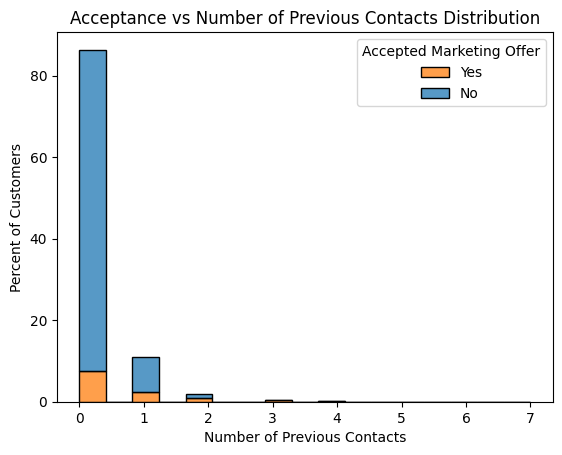

In [32]:
fig = sns.histplot(df, x='previous', hue='y',stat='percent',multiple='stack')
fig.set_xlabel('Number of Previous Contacts')
fig.set_ylabel('Percent of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['Yes','No'])
fig.set_title('Acceptance vs Number of Previous Contacts Distribution');

Reviewing **outcome from previous campaign** value options distribution

In [33]:
df[['poutcome']].value_counts(normalize=True).sort_values(ascending=False)*100
df[['poutcome','y']].value_counts(normalize=True).sort_values(ascending=False)*100

poutcome   
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: proportion, dtype: float64

poutcome     y  
nonexistent  no     78.717102
failure      no      8.854521
nonexistent  yes     7.626008
success      yes     2.170535
failure      yes     1.468874
success      no      1.162960
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Previous Campaign Outcome Value Options Distribution')

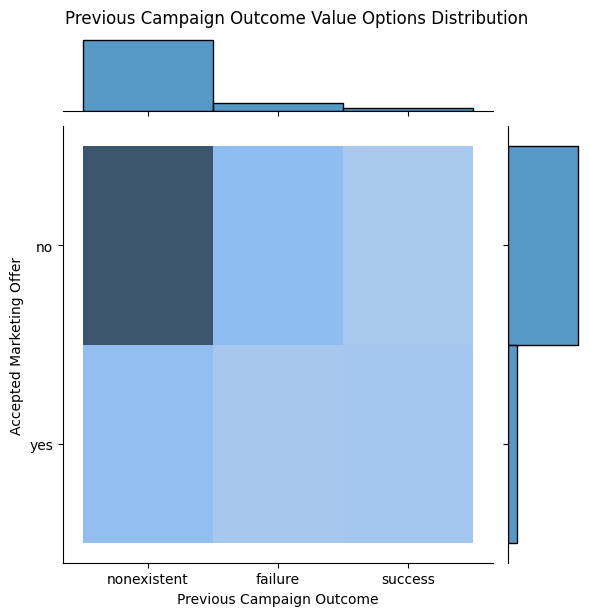

In [34]:
fig = sns.jointplot(df[['poutcome','y']], x='poutcome', y='y', kind='hist')
fig.set_axis_labels('Previous Campaign Outcome','Accepted Marketing Offer')
plt.suptitle('Previous Campaign Outcome Value Options Distribution', y=1.02)

###Target Variable Analisis

In [35]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

The Target variable is clearly unbalanced

### Initial Observations and Optimization:

The received Data Set has no missing info, all features show the same value counts, however several features includes "uknown" observations.

### Customer related Features
* **Age** can be grouped into three categories given its distribution (M=40 S=10): "Under 30", "30-50", "Over 50"
* **Job** shows weak correlation between the value options to be bundled into broader categories hence this feature could be initially ignored
* **Marital Status** can be grouped into two categories given its even distribution after aggregation as: "Single" and "Not Single"
* **Education** can be grouped into professional education or not
* **Default** values distribution is very skewed towards "not defaulted", remaining is uknown hence this feature should be ignored
* **Housing** need to fill in the unknown values
* **Loan** values distribution very skewed, some normalization and filling in the unknown values is required.
### Campaign related Features
* **Contact** the feature needs additiona analysis
* **Month** feature could be simplified by quarters, encoding required.
* **Day of Week** each day has similar success rate making it somewhat irrelevant for business goal
* **Duration** will be ignored
### Other Features
* **Campaign** only the 3 first observations includes +80% of customers, we will group into "1" and "2 or more"
* **P-Days** skewed (96.3%) of customer "not contacted" , ignored
* **Previous** skewed (86%) will encode as binary: "Not contacted" or "Contacted"
* **POutcome** skewed (86%) are nonexistent hence this feature should be ignored
### Economy related Features
* **Employmnet Variation Rate**
* **Consumer Price Index**
* **Consumer Confidence Index**
* **Euribor 3 Month Rate**
* **Number of Employees**

These features are considered macro-economic and sesonal figures, hard to correlate to the date of customer interaction,  therefore these features may be ignored.

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

----

### Business Objective
** Apply the CRISP-DM methodology to  Identify the best Machine Learning Classification model that can be used along with the factors that drive the success of direct marketing campaigns for a Banking. The evaluation of the best model will be based on the data available from the Bank's previous marketing campaigns,which include personal customer data and some parameters about the product offered to that customer being the target varible the acceptance or rejection of the product offered.**

----

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Creating engineered data frame

In [37]:
df_eng = df.drop(columns=['job','default','day_of_week','duration','pdays','poutcome',\
                            'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

Aggregating **Age** category values

In [38]:
df_eng['age'] = df.apply(lambda x: 'Undr 30' if (x['age'] < 30) else '40 - 50' if (x['age'] <= 50) else 'Over 50', axis=1)
df_eng['age'].value_counts(normalize=True)*100

age
40 - 50    68.804021
Over 50    17.432262
Undr 30    13.763718
Name: proportion, dtype: float64

Aggregating and encoding **Marital** category values

In [39]:
df_eng['marital'] = df['marital'].map({'single':0,
                                       'divorced':0,
                                       'married':1})
df_eng['marital'].value_counts(normalize=True)*100

marital
1.0    60.640265
0.0    39.359735
Name: proportion, dtype: float64

Aggregating and encoding **Education** category values

In [40]:
df_eng['education'] = df['education'].map({'illiterate':0,
                                           'basic.4y':0,
                                           'basic.6y':0,
                                           'basic.9y':0,
                                           'high.school':0,
                                           'professional.course':1,
                                           'university.degree':1})
df_eng['education'].value_counts(normalize=True)*100

education
0.0    55.873483
1.0    44.126517
Name: proportion, dtype: float64

Encoding **Housing** category values

In [41]:
df_eng['housing'] = df['housing'].map({'no':0,'yes':1})
df_eng['housing'].value_counts(normalize=True)*100

housing
1.0    53.674312
0.0    46.325688
Name: proportion, dtype: float64

Encoding **Loan** category values

In [42]:
df_eng['loan'] = df['loan'].map({'no':0,'yes':1})
df_eng['loan'].value_counts(normalize=True)*100

loan
0.0    84.456938
1.0    15.543062
Name: proportion, dtype: float64

Encoding **Contact** category values

In [43]:
df_eng['contact'] = df['contact'].map({'telephone':0,'cellular':1})
df_eng['contact'].value_counts(normalize=True)*100

contact
1    63.474798
0    36.525202
Name: proportion, dtype: float64

Aggregating **Month** category values

In [44]:
df_eng['month'] = df['month'].map({'mar':'q1',
                                   'apr':'q2','may':'q2','jun':'q2',
                                   'jul':'q3','aug':'q3','sep':'q3',
                                   'oct':'q4','nov':'q4','dec':'q4'})
df_eng['month'].value_counts(normalize=True)*100

month
q2    52.731378
q3    33.801107
q4    12.141886
q1     1.325629
Name: proportion, dtype: float64

Encoding **Campaign** category values

In [45]:
df_eng['campaign'] = df.apply(lambda x: 0 if (x['campaign'] == 1) else 1, axis=1)
df_eng['campaign'].value_counts(normalize=True)*100

campaign
1    57.167136
0    42.832864
Name: proportion, dtype: float64

Encoding **Previous** category values

In [46]:
df_eng['previous'] = df.apply(lambda x: 1 if (x['previous'] >0) else 0, axis=1)
df_eng['previous'].value_counts(normalize=True)*100

previous
0    86.34311
1    13.65689
Name: proportion, dtype: float64

Filling in missing data as a result of **'unknown'** values in some categories

In [47]:
df_eng['marital'] = df_eng['marital'].ffill()
df_eng['education'] = df_eng['education'].ffill()
df_eng['housing'] = df_eng['housing'].ffill()
df_eng['loan'] = df_eng['loan'].ffill()
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41188 non-null  object 
 1   marital    41188 non-null  float64
 2   education  41188 non-null  float64
 3   housing    41188 non-null  float64
 4   loan       41188 non-null  float64
 5   contact    41188 non-null  int64  
 6   month      41188 non-null  object 
 7   campaign   41188 non-null  int64  
 8   previous   41188 non-null  int64  
 9   y          41188 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 3.1+ MB


Encoding **discrete** categories

In [48]:
colTrans = ColumnTransformer([('ohe', OneHotEncoder(), ['age','month'])],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
df_trans = pd.DataFrame(colTrans.fit_transform(df_eng),columns=colTrans.get_feature_names_out())

Resetting columns data type for final data set

In [49]:
df_eng = df_trans.convert_dtypes()
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age_40 - 50  41188 non-null  Int64 
 1   age_Over 50  41188 non-null  Int64 
 2   age_Undr 30  41188 non-null  Int64 
 3   month_q1     41188 non-null  Int64 
 4   month_q2     41188 non-null  Int64 
 5   month_q3     41188 non-null  Int64 
 6   month_q4     41188 non-null  Int64 
 7   marital      41188 non-null  Int64 
 8   education    41188 non-null  Int64 
 9   housing      41188 non-null  Int64 
 10  loan         41188 non-null  Int64 
 11  contact      41188 non-null  Int64 
 12  campaign     41188 non-null  Int64 
 13  previous     41188 non-null  Int64 
 14  y            41188 non-null  string
dtypes: Int64(14), string(1)
memory usage: 5.3 MB


## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

Split between features(independent variables) and target (dependent variable)

In [50]:
X = df_eng.drop(columns=['y'])
y = df_eng['y']
df_eng['y'].value_counts(normalize=True)*100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: Float64

Creating Train and Test data sets

**Note:** Given the imbalance in classes for the target variable  (8:1), the **stratify** option is used during the split, this option should be used with cation as it reduce bias , also our models could not generalize well because it might reduce the number of samples in each class.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142, stratify=y)

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [52]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape
np.unique(y_test,return_counts=True)
np.unique(y_train,return_counts=True)

(30891, 14)

(10297, 14)

(30891,)

(10297,)

(array(['no', 'yes'], dtype=object), array([9137, 1160]))

(array(['no', 'yes'], dtype=object), array([27411,  3480]))

---

Given the value distribution for the target variable, the baseline performance is **88.73%**

---

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Logistic Regresssion

Instantiating a Logistic Regression model object

In [53]:
logRegMod = LogisticRegression()

Fitting the model witht the train data

In [54]:
%%time
logRegMod.fit(X_train,y_train)

CPU times: user 278 ms, sys: 23.4 ms, total: 301 ms
Wall time: 61.2 ms


LogisticRegression()

## Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Train Accuracy

In [55]:
logRegAcc_train = logRegMod.score(X_train,y_train)
round(logRegAcc_train,4)

0.8878

Logistic Regression Test Accuracy

In [56]:
logRegAcc_test = logRegMod.score(X_test,y_test)
round(logRegAcc_test,4)

0.8886

---

The mean accuracy of the basic Logistic Regression Model is **88.78 and 0.8886 respectively%**

---

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### K Nearest Neighbors

Instantiating a K Neighbors Classifier model object

In [57]:
knnClsMod = KNeighborsClassifier()

Fitting the model with the train data

In [58]:
%%time
knnClsMod.fit(X_train,y_train)

CPU times: user 56.7 ms, sys: 229 ms, total: 286 ms
Wall time: 32.8 ms


KNeighborsClassifier()

KNN Train Accuracy

In [59]:
knnClsAcc_train = knnClsMod.score(X_train,y_train)
round(knnClsAcc_train,4)

0.8891

KNN Test Accuracy

In [60]:
knnClsAcc_test = knnClsMod.score(X_test,y_test)
round(knnClsAcc_test,4)

0.8817

---

The mean accuracy of the basic K Nearest Neighbors Model is **88.91 and 0.8817 respectively%**

---

### Decision Tree

Instantiating a Decision Tree model object

In [61]:
decTreMod = DecisionTreeClassifier()

Fitting the model with the train data

In [62]:
%%time
decTreMod.fit(X_train,y_train)

CPU times: user 33.1 ms, sys: 849 µs, total: 34 ms
Wall time: 33.7 ms


DecisionTreeClassifier()

Decision Tree Train Accuracy

In [63]:
decTreAcc_train = decTreMod.score(X_train,y_train)
round(decTreAcc_train,4)

0.8971

Decision Tree Test Accuracy

In [64]:
decTreAcc_test = decTreMod.score(X_test,y_test)
round(decTreAcc_test,4)

0.8878

---

The mean accuracy of the basic Decision Tree Model is **88.71 and 0.8875 respectively%**

---

### Support Vector Machine

Instantiating a Support Vector Machine model object

In [65]:
svmClsMod = SVC()

Fitting the model with the train data

In [66]:
%%time
svmClsMod.fit(X_train,y_train)

CPU times: user 5.14 s, sys: 97.1 ms, total: 5.24 s
Wall time: 5.25 s


SVC()

SVC Train Accuracy

In [67]:
svmClsAcc_train = svmClsMod.score(X_train,y_train)
round(svmClsAcc_train,4)

0.8905

In [68]:
svmClsAcc_test = svmClsMod.score(X_test,y_test)
round(svmClsAcc_test,4)

0.8885

---

The mean accuracy of the basic Support Vector Machine Model is **0.8905 and 0.8885 respectively%**

---

Comparing the models performance

In [69]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'Train Accuracy':[logRegAcc_train,knnClsAcc_train,decTreAcc_train,svmClsAcc_train],
    'Test Accuracy':[logRegAcc_test,knnClsAcc_test,decTreAcc_test,svmClsAcc_test]})\
    .set_index('Model').sort_values(by=['Test Accuracy'],ascending=False)
df_Models

,Train Accuracy,Test Accuracy
Model,,
LogisticRegression,0.887767,0.888608
SupportVectorMachine,0.890486,0.888511
DecisionTree,0.897122,0.887831
K-NearestNeighbors,0.889094,0.881713


---

### Observations

All models with default values have similar test accuracy, which are also very close to the accuracy of the **Baseline** model. The **SVM** model takes significantly more time to train than the rest, being **Decision Tree** a lot faster than the others

---

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

---

### Improvement recommendations

* We have done downsizing in the features set and the fitting times are low for the current engineered data set , we will now conduct  hyperparameter tunning
* The business objective is evaluate every model's performance with the same data set
* Accuracy may not be the best metric to use in this benchmarking, given the imbalanced classes for the target variable, we will try several scoring methodologies
* We will use Grid Search with F1-score metric to find an equal balance between precision and recall, as we are working with an imbalanced dataset

---

### Logistic Regression Tuning

Configuring search paramaters for the grid search estimator

In [70]:
f1_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label='yes')

In [71]:
logRegParams = {'penalty':['l2'],
                'fit_intercept':[False,True],
                'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}

Instantiating the grid search object


In [72]:
logRegGrd =  GridSearchCV(estimator=logRegMod,
                          param_grid=logRegParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [73]:
%%time
logRegGrd.fit(X_train,y_train)

CPU times: user 36.9 s, sys: 58.7 s, total: 1min 35s
Wall time: 10.7 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [False, True], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes))

Best model **parameters**

In [74]:
logRegGrd.best_params_

{'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Best model **probabilities**

In [75]:
logRegProbs = logRegGrd.best_estimator_.predict_proba(X_test)[:,1]
logRegProbs

array([0.03827881, 0.29695008, 0.21159438, ..., 0.03741585, 0.04313191,
       0.08623063])

Best model **predictions**

In [76]:
logRegPreds = logRegGrd.best_estimator_.predict(X_test)
logRegPreds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

**Mean cross-validated score of the best_estimator**

In [77]:
logRegF1 = logRegGrd.best_score_
round(logRegF1,4)
logRegF1=f1_score(y_test,logRegPreds,pos_label='yes')
round(logRegF1,4)

0.053

0.0481

Best model **accuracy**

In [78]:
logRegAcc = accuracy_score(y_test,logRegPreds)
round(logRegAcc,4)

0.8884

Best model **precision**

In [79]:
logRegPre = precision_score(y_test,logRegPreds, pos_label='yes')
round(logRegPre,4)

0.617

Best model **recall**

In [80]:
logRegRec = recall_score(y_test, logRegPreds, pos_label='yes')
round(logRegRec,4)

0.025

Best model **Receiver Operating Characteristic Area Under the Curve**

In [81]:
logRegAuc = roc_auc_score(y_test, logRegProbs)
round(logRegAuc,4)

0.7085

**Logistic Regression Confusion Matrix**

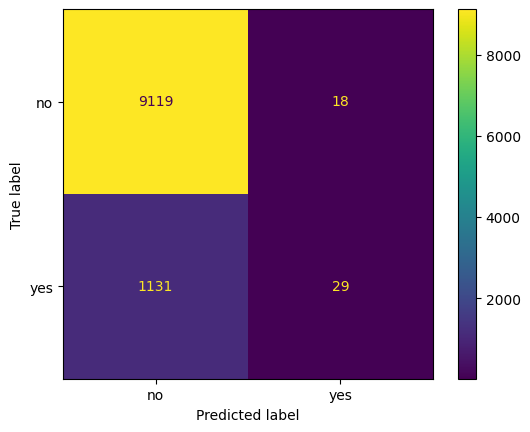

In [82]:
logRegCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,logRegPreds),display_labels=['no','yes'])
logRegCnfMtx.plot()

### K Nearest Neighbors Tuning

Configuring search paramaters for the grid search estimator

In [83]:
knnClsParams = {'n_neighbors':[3,5,10,15]}

Instantiating the grid search object

In [84]:
knnClsGrd =  GridSearchCV(estimator=knnClsMod,
                          param_grid=knnClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [85]:
%%time
knnClsGrd.fit(X_train,y_train)

CPU times: user 42.8 s, sys: 196 ms, total: 43 s
Wall time: 42.6 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes))

Best model **parameters**

In [86]:
knnClsGrd.best_params_

{'n_neighbors': 5}

Best model **probabilities**

In [87]:
knnClsProbs = knnClsGrd.best_estimator_.predict_proba(X_test)[:,1]
knnClsProbs

array([0. , 0.4, 0. , ..., 0. , 0. , 0.2])

Best model **predictions**

In [88]:
knnClsPreds = knnClsGrd.best_estimator_.predict(X_test)
knnClsPreds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

**Mean cross-validated score of the best_estimator**

In [89]:
knnClsF1 = knnClsGrd.best_score_
round(knnClsF1,4)
knnClsF11=f1_score(y_test,logRegPreds,pos_label='yes')
round(knnClsF1,4)

0.1962

0.1962

Best model **accuracy**

In [90]:
knnClsAcc = accuracy_score(y_test,knnClsPreds)
round(knnClsAcc,4)

0.8817

Best model **precision**

In [91]:
knnClsPre = precision_score(y_test,knnClsPreds,pos_label='yes')
round(knnClsPre,4)

0.4212

Best model **recall**

In [92]:
knnClsRec = recall_score(y_test,knnClsPreds,pos_label='yes')
round(knnClsRec,4)

0.1336

Best model **Receiver Operating Characteristic Area Under the Curve**

In [93]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
round(knnClsAuc,4)

0.6307

**K Nearest Neighbors Confusion Matrix**

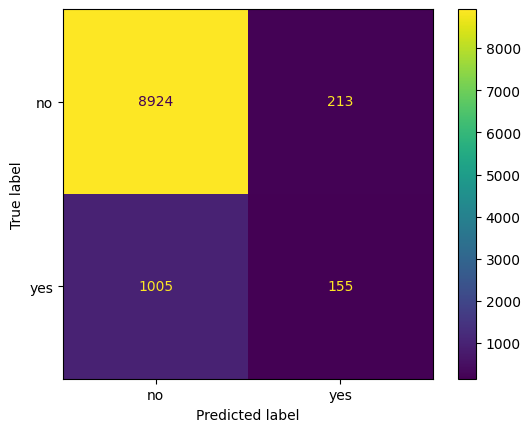

In [94]:
knnClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,knnClsPreds),display_labels=['no','yes'])
knnClsCnfMtx.plot()

### Decision Tree Tuning

Configuring search paramaters for the grid search estimator

In [95]:
decTreParams = {'max_depth':[2,3,5,7,10,15],
                'criterion':['gini','entropy','log_loss'],
                'min_samples_split':[2,4,6,8],
                'min_samples_leaf':[1,2,3,5]}

Instantiating the grid search object

In [96]:
decTreGrd =  GridSearchCV(estimator=decTreMod,
                          param_grid=decTreParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [97]:
%%time
decTreGrd.fit(X_train,y_train)

CPU times: user 2min 21s, sys: 1.97 s, total: 2min 23s
Wall time: 2min 23s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes))

Best model **parameters**

In [98]:
decTreGrd.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Best model **probabilities**

In [99]:
decTreProbs = decTreGrd.best_estimator_.predict_proba(X_test)[:,1]
decTreProbs

array([0.0462307 , 0.20668058, 0.20668058, ..., 0.0462307 , 0.0462307 ,
       0.11108222])

Best model **predictions**

In [100]:
decTrePreds = decTreGrd.best_estimator_.predict(X_test)
decTrePreds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

**Mean cross-validated score of the best_estimator**

In [101]:
decTreF1 = decTreGrd.best_score_
decTreF1
decTreF1=f1_score(y_test,logRegPreds,pos_label='yes')
round(decTreF1,4)

0.19177386071298985

0.0481

Best model **accuracy**

In [102]:
decTreAcc = accuracy_score(y_test,decTrePreds)
round(decTreAcc,4)

0.8921

Best model **precision**

In [103]:
decTrePre = precision_score(y_test,decTrePreds,pos_label='yes')
round(decTrePre,4)

0.5798

Best model **recall**

In [104]:
decTreRec = recall_score(y_test,decTrePreds,pos_label='yes')
round(decTreRec,4)

0.1534

Best model **Receiver Operating Characteristic Area Under the Curve**

In [105]:
decTreAuc = roc_auc_score(y_test,decTreProbs)
round(decTreAuc,4)

0.6842

**Decision Tree Confusion Matrix**

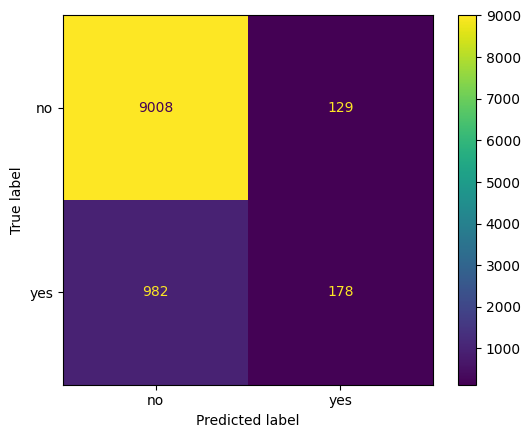

In [106]:
decTreCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,decTrePreds),display_labels=['no','yes'])
decTreCnfMtx.plot()

Decision Tree Plot

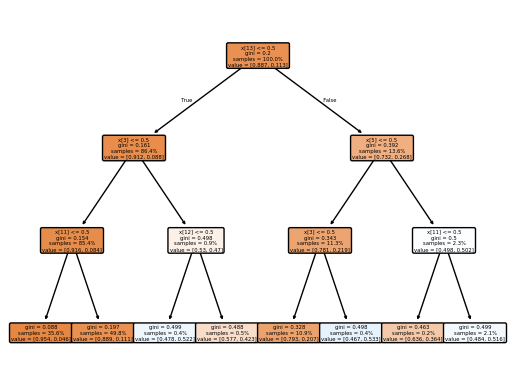

In [107]:
fig = plot_tree(decTreGrd.best_estimator_, filled=True, proportion=True, rounded=True)

### Support Vector Machine Tuning

Configuring search paramaters for the grid search estimator

In [108]:
svmClsParams = {'C':[0.1,1.0,10],
                'kernel':['rbf','linear','poly'],
                'degree':[3],
                'gamma':['scale','auto']}

Instantiating the grid search object

In [109]:
svmClsGrd =  GridSearchCV(estimator=svmClsMod,
                          param_grid=svmClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [110]:
%%time
svmClsGrd.fit(X_train,y_train)

CPU times: user 11min 12s, sys: 7.29 s, total: 11min 19s
Wall time: 11min 22s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10], 'degree': [3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes))

Best model **parameters**

In [111]:
svmClsGrd.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Best model with probabilities

In [112]:
svmClsMod = SVC(C=10,probability=True).fit(X_train,y_train)
svmClsMod

SVC(C=10, probability=True)

Best model **probabilities**

In [113]:
svmClsProbs = svmClsMod.predict_proba(X_test)[:,1]
svmClsProbs

array([0.10351655, 0.10343608, 0.10349196, ..., 0.10344434, 0.10348558,
       0.10349045])

Best model **predictions**

In [114]:
svmClsPreds = svmClsGrd.best_estimator_.predict(X_test)
svmClsPreds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

**Mean cross-validated score of the best_estimator**

In [115]:
svmClsF1 = svmClsGrd.best_score_
svmClsF1
svmClsF1=f1_score(y_test,logRegPreds,pos_label='yes')
round(svmClsF1,4)

0.1650354972887615

0.0481

Best model **accuracy**

In [116]:
svmClsAcc = accuracy_score(y_test,svmClsPreds)
round(svmClsAcc,4)

0.8888

Best model **precision**

In [117]:
svmClsPre = precision_score(y_test,svmClsPreds,pos_label='yes')
round(svmClsPre,4)

0.5319

Best model **recall**

In [118]:
svmClsRec = recall_score(y_test,svmClsPreds,pos_label='yes')
round(svmClsRec,4)

0.1078

Best model **Receiver Operating Characteristic Area Under the Curve**

In [119]:
svmClsAuc = roc_auc_score(y_test,svmClsProbs)
round(svmClsAuc,4)

0.5983

**Support Vector Machine Confusion Matrix**

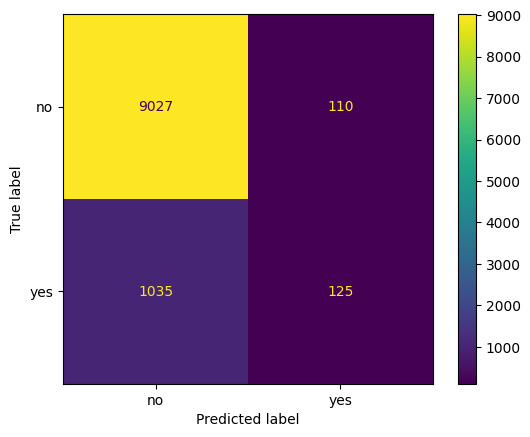

In [120]:
svmClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,svmClsPreds),display_labels=['no','yes'])
svmClsCnfMtx.plot()

### Best Models Performance Comparison

In [121]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1,knnClsF1,decTreF1,svmClsF1],
    'Accuracy':[logRegAcc,knnClsAcc,decTreAcc,svmClsAcc],
    'Precision':[logRegPre,knnClsPre,decTrePre,svmClsPre],
    'Recall':[logRegRec,knnClsRec,decTreRec,svmClsRec],
    'AUC':[logRegAuc,knnClsAuc,decTreAuc,svmClsAuc]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

,F1,Accuracy,Precision,Recall,AUC
Model,,,,,
K-NearestNeighbors,0.196162,0.881713,0.421196,0.133621,0.630729
DecisionTree,0.048053,0.892104,0.579805,0.153448,0.684183
SupportVectorMachine,0.048053,0.888803,0.531915,0.107759,0.598284
LogisticRegression,0.048053,0.888414,0.617021,0.025000,0.708546


### Observations

* F1 scoring is very low for all the models which implies a difficulty in balancing Precision and Recall
* That is  due to the 8:1 unbalanced  for the target variable, despite the stratification used Train/Test split
* Additional effort has to be done to create a model supporting this unbalance
* SVM Classifier Grid Search had to be limited due to the excesive computing time required

## Conclusions

---

* Based on these results, and the different metrics used to score the models  to classify the tele-marketing data, the recommendation is to use **K Nearest Neighbors**


the second best option would be to use a **Decision Tree** model


* These models deliver an acceptable balance between performance scoring, easy to tune hyper-parameters, and acceptable fitting times


---

## Recommendations

* Given the challenges with the received unbalanced data set, the main recommendation is to further improve the data engineering process and apply more elaborate techniques like Synthetic Minority Oversampling Technique,(SMOTE) to reduce that condition
* Use more elaborated  tunning  on the engineered data and assess any improvement in performance. 


## Questions

From the **CRISP-DM** methodology perspective:
* How to correctly fit and evaluate machine learning models on SMOTE-transformed training datasets.
